Описание проблемы

Ваш клиент компания “Natural Grocery” – сеть продуктовых магазинов, основным отличием которых является широкий ассортимент натуральных продуктов. “Natural Grocery” показывает бурный рост выручки, и ее основной приоритет на ближайшие два года – это быстрое масштабирование бизнеса. В частности, для компании важно выбирать перспективное местоположение под открытие магазина за максимально короткий срок.

Для того, чтобы обеспечить высокий темп расширения сети директор по развитию “Natural Grocery” обратился за помощью в компанию ЦПИ, и Вам как аналитику поручено вести данный проект.

По итогам предварительной встречи с Клиентом были сформулированы два ключевых направления работ: выявление основных драйверов выручки магазинов и построение прогнозной модели для принятия решений о выборе мест под открытие новых магазинов “Natural Grocery”. Для этих целей, директор по развитию выслал Вам внутренние данные компании о 200+ магазинах.

Задание

Сформулировать и проверить 3-5 гипотез относительно факторов,
влияющих на выручку. 2. Построить упрощенную модель, прогнозирующую показатель “daily_revenue”. 3. Составить список дополнительных данных, необходимых для дальнейшего анализа. 4. Подготовить презентацию (3-5 слайдов) с описанием результатов. 5. Дополнительным плюсом будет реализованный код на Python в формате .ipynb (иные языки программирования не рассматриваются).

| Переменная           | Описание                                                          |
|----------------------|-------------------------------------------------------------------|
| shop_id              | Идентификатор магазина                                            |
| format               | Формат магазина                                                   |
| type                 | Тип расположения магазина                                         |
| city_type            | Тип населенного пункта                                            |
| Open_Days            | Количество дней с момента открытия магазина                      |
| sku_amount           | Количество уникальных товарных позиций в магазине, шт.           |
| trade_area           | Площадь торгового зала, м2                                         |
| open_time            | Время открытия магазина, час.                                     |
| close_time           | Время закрытия магазина, час.                                    |
| junction_distance    | Расстояние до ближайшего перекрестка, м                          |
| people_R800         | Численность населения в радиусе 800м, чел.                         |
| ped_traffic          | Оценка пешеходного потока, у.е.                                   |
| metro_traffic        | Пассажиропоток ближайшей станции метро, чел./день                 |
| metro_time           | Время пути от ближайшей станции метро до магазина, мин             |
| income_R600          | Оценка среднего дохода семьи в радиусе 600м, $ в месяц            |
| supermarkets_R500   | Количество супермаркетов в радиусе 500м                             |
| special_R500        | Количество специализированных продуктовых магазинов в радиусе 500м |
| hypermarkets_R500   | Количество гипермаркетов в радиусе 500м                            |
| others_R500         | Количество прочих продуктовых магазинов в радиусе 500м            |
| self_R800           | Количество магазинов собственной сети в радиусе 500м              |
| revenue_weekday_share | Доля выручки в будние дни в общей недельной выручке             |
| revenue_per_bill    | Средний чек магазина, $                                           |
| daily_revenue        | Среднедневная выручка магазина, $ (целевая переменная)            |


In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from math import sqrt
from scipy.stats import norm
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [110]:
data = 'Analyst_test_data.xlsx - data.csv'
df = pd.read_csv(data)
df

,shop_id,format,type,city_type,Open_Days,sku_amount,trade_area,open_time,close_time,junction_distance,...,metro_time,income_R600,supermarkets_R500,special_R500,hypermarkets_R500,others_R500,self_R800,revenue_weekday_share,revenue_per_bill,daily_revenue
0,1,usual,traffic,Urban,1945,2320,122,8,23,23,...,13.0,"3000,54",7,1,0,7,1,"0,7024586073","10,91","6838,26"
1,2,mini,traffic,Urban,1947,2293,"72,4",9,22,21,...,30.0,"2293,89",6,7,0,2,3,"0,6932913839","7,77","3153,82"
2,3,usual,traffic,Urban,1947,2292,86,8,22,9,...,11.0,"2989,32",7,6,0,12,1,"0,7028768931","9,02","5227,23"
3,4,usual,traffic,Urban,1947,2303,96,8,23,47,...,6.0,"2371,89",4,6,0,15,0,"0,7366695868","7,51","5087,04"
4,5,usual,residential,Urban,1460,2322,170,10,22,57,...,6.0,"2000,49",4,18,0,17,2,"0,65876139","10,02","8258,16"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,222,mini,traffic,Urban,382,2263,128,8,23,37,...,3.0,"2970,75",9,4,0,5,2,"0,7602870515","7,79","4178,32"
222,223,mini,traffic,Urban,376,2251,"76,8",8,23,49,...,4.0,"1945,09",7,7,0,6,1,"0,7196845183","7,6","3414,74"
223,224,mini,residential,Rural,380,2223,116,9,22,44,...,NaN,NaN,5,1,0,0,1,"0,6412417073","6,19","2692,25"
224,225,mini,residential,Urban,379,2246,117,9,22,31,...,14.0,"1966,23",7,8,0,9,1,"0,6662935201","8,49","3021,28"


In [111]:
# Вывод статистики пропущенных значений для каждого признака
print("Статистика пропущенных значений для каждого признака:\n")
print(df.isnull().sum()/len(df)*100)

Статистика пропущенных значений для каждого признака:

shop_id                   0.000000
format                    0.000000
type                      0.000000
city_type                 0.000000
Open_Days                 0.000000
sku_amount                0.000000
trade_area                0.000000
open_time                 0.000000
close_time                0.000000
junction_distance         0.000000
people_R800               0.000000
ped_traffic               0.000000
metro_traffic            39.380531
metro_time               40.265487
income_R600              39.380531
supermarkets_R500         0.000000
special_R500              0.000000
hypermarkets_R500         0.000000
others_R500               0.000000
self_R800                 0.000000
revenue_weekday_share     0.000000
revenue_per_bill          0.000000
daily_revenue             0.000000
dtype: float64


In [112]:
print('\nДубликатов в выборке: {}\n'.format(df.duplicated().sum()))


Дубликатов в выборке: 0



In [113]:
# Замена запятых на точки в числовых столбцах и преобразование их в тип float
columns_to_clean = ['trade_area', 'income_R600', 'revenue_weekday_share', 'revenue_per_bill', 'daily_revenue']
for col in columns_to_clean:
    df[col] = df[col].str.replace(',', '.').astype(float)

# Вывод очищенных данных
df.head()

,shop_id,format,type,city_type,Open_Days,sku_amount,trade_area,open_time,close_time,junction_distance,...,metro_time,income_R600,supermarkets_R500,special_R500,hypermarkets_R500,others_R500,self_R800,revenue_weekday_share,revenue_per_bill,daily_revenue
0,1,usual,traffic,Urban,1945,2320,122.0,8,23,23,...,13.0,3000.54,7,1,0,7,1,0.702459,10.91,6838.26
1,2,mini,traffic,Urban,1947,2293,72.4,9,22,21,...,30.0,2293.89,6,7,0,2,3,0.693291,7.77,3153.82
2,3,usual,traffic,Urban,1947,2292,86.0,8,22,9,...,11.0,2989.32,7,6,0,12,1,0.702877,9.02,5227.23
3,4,usual,traffic,Urban,1947,2303,96.0,8,23,47,...,6.0,2371.89,4,6,0,15,0,0.736670,7.51,5087.04
4,5,usual,residential,Urban,1460,2322,170.0,10,22,57,...,6.0,2000.49,4,18,0,17,2,0.658761,10.02,8258.16


In [114]:
# Расчет рабочих часов для каждого магазина
df['working_hours'] = df['close_time'] - df['open_time']

In [115]:
#изучаем прпущенные значения
mv = df[df.isnull().any(axis=1)]
mv


,shop_id,format,type,city_type,Open_Days,sku_amount,trade_area,open_time,close_time,junction_distance,...,income_R600,supermarkets_R500,special_R500,hypermarkets_R500,others_R500,self_R800,revenue_weekday_share,revenue_per_bill,daily_revenue,working_hours
9,10,usual,residential,Rural,1318,2292,70.0,9,22,47,...,NaN,3,3,0,1,0,0.665250,12.44,7561.40,13
17,18,usual,traffic,Rural,1167,2268,149.0,9,21,36,...,NaN,5,6,0,0,1,0.636859,8.00,6536.42,12
19,20,mini,traffic,Rural,1182,2226,36.0,9,22,37,...,NaN,7,4,0,10,0,0.684547,7.88,3732.70,13
21,22,mini,traffic,Rural,1063,2255,67.0,8,22,38,...,NaN,11,9,0,11,3,0.715344,6.88,3550.33,14
25,26,usual,traffic,Rural,1049,2294,71.6,9,22,38,...,NaN,8,7,0,7,0,0.669434,8.37,7491.28,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,215,mini,traffic,Rural,409,2239,75.0,9,22,37,...,NaN,4,4,1,0,1,0.665430,8.04,3292.32,13
217,218,mini,traffic,Rural,397,2224,104.0,10,22,68,...,NaN,3,0,0,0,0,0.644708,10.04,2573.39,12
218,219,mini,traffic,Rural,390,2225,117.2,9,22,68,...,NaN,4,9,0,0,0,0.659586,6.77,2535.81,13
220,221,usual,residential,Rural,369,2236,138.7,9,22,53,...,NaN,5,5,0,1,0,0.650740,10.09,4981.42,13


In [116]:
# Подсчет уникальных значений в колонке 'city_type' в поднаборе данных mv
unique_city_types_mv = mv['city_type'].value_counts()

unique_city_types_mv


city_type
Rural    89
Urban     2
Name: count, dtype: int64

In [117]:
# Фильтрация данных для анализа пропущенных значений в 'metro_traffic' и 'metro_time' в отношении 'city_type'
missing_metro_traffic = mv[mv['metro_traffic'].isnull()]['city_type'].value_counts()
missing_metro_time = mv[mv['metro_time'].isnull()]['city_type'].value_counts()

missing_metro_traffic, missing_metro_time


(city_type
 Rural    89
 Name: count, dtype: int64,
 city_type
 Rural    89
 Urban     2
 Name: count, dtype: int64)

In [118]:
# выбрать metro_traffic и metro_time для городов типа Urban
mv_metro = mv.loc[(mv['city_type'] == 'Urban'), ['metro_traffic', 'metro_time']]
mv_metro


,metro_traffic,metro_time
72,62200.0,NaN
132,31300.0,NaN


In [119]:
# выбрать метро тайм в городе типа Urban
metro_time_urban = df.loc[(df['city_type'] == 'Urban'), ['metro_time']]
#вычислим долю пропущенных значений
missing_metro_time_urban = metro_time_urban.isnull().sum()/len(metro_time_urban)*100
missing_metro_time_urban

metro_time    1.459854
dtype: float64

In [120]:
# Фильтрация DataFrame для выбора только строк, где 'city_type' равен 'Urban'
df_urban = df[df['city_type'] == 'Urban']

# Удаление строк, где 'metro_time' равен NaN (пропущено)
df_urban = df_urban.dropna(subset=['metro_time'])


In [121]:
# Вывод статистики пропущенных значений для каждого признака
print("Статистика пропущенных значений для каждого признака:\n")
print(df_urban.isnull().sum()/len(df_urban)*100)

Статистика пропущенных значений для каждого признака:

shop_id                  0.0
format                   0.0
type                     0.0
city_type                0.0
Open_Days                0.0
sku_amount               0.0
trade_area               0.0
open_time                0.0
close_time               0.0
junction_distance        0.0
people_R800              0.0
ped_traffic              0.0
metro_traffic            0.0
metro_time               0.0
income_R600              0.0
supermarkets_R500        0.0
special_R500             0.0
hypermarkets_R500        0.0
others_R500              0.0
self_R800                0.0
revenue_weekday_share    0.0
revenue_per_bill         0.0
daily_revenue            0.0
working_hours            0.0
dtype: float64


In [122]:
# Create a DataFrame df_rural that contains only the rows where city_type is 'Rural', 
# and drop columns where any value is missing.
df_rural = df[df['city_type'] == 'Rural'].dropna(axis=1)

df_rural.head()


,shop_id,format,type,city_type,Open_Days,sku_amount,trade_area,open_time,close_time,junction_distance,...,ped_traffic,supermarkets_R500,special_R500,hypermarkets_R500,others_R500,self_R800,revenue_weekday_share,revenue_per_bill,daily_revenue,working_hours
9,10,usual,residential,Rural,1318,2292,70.0,9,22,47,...,26029,3,3,0,1,0,0.665250,12.44,7561.40,13
17,18,usual,traffic,Rural,1167,2268,149.0,9,21,36,...,43726,5,6,0,0,1,0.636859,8.00,6536.42,12
19,20,mini,traffic,Rural,1182,2226,36.0,9,22,37,...,29546,7,4,0,10,0,0.684547,7.88,3732.70,13
21,22,mini,traffic,Rural,1063,2255,67.0,8,22,38,...,106030,11,9,0,11,3,0.715344,6.88,3550.33,14
25,26,usual,traffic,Rural,1049,2294,71.6,9,22,38,...,30707,8,7,0,7,0,0.669434,8.37,7491.28,13


In [123]:
# Вывод статистики пропущенных значений для каждого признака
print("Статистика пропущенных значений для каждого признака:\n")
print(df_rural.isnull().sum()/len(df_rural)*100)

Статистика пропущенных значений для каждого признака:

shop_id                  0.0
format                   0.0
type                     0.0
city_type                0.0
Open_Days                0.0
sku_amount               0.0
trade_area               0.0
open_time                0.0
close_time               0.0
junction_distance        0.0
people_R800              0.0
ped_traffic              0.0
supermarkets_R500        0.0
special_R500             0.0
hypermarkets_R500        0.0
others_R500              0.0
self_R800                0.0
revenue_weekday_share    0.0
revenue_per_bill         0.0
daily_revenue            0.0
working_hours            0.0
dtype: float64


In [145]:
df_urban.describe()


,shop_id,Open_Days,sku_amount,trade_area,open_time,close_time,junction_distance,people_R800,ped_traffic,metro_traffic,...,income_R600,supermarkets_R500,special_R500,hypermarkets_R500,others_R500,self_R800,revenue_weekday_share,revenue_per_bill,daily_revenue,working_hours
count,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,...,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,104.600000,736.592593,2280.844444,101.135556,8.340741,22.429630,37.925926,36834.103704,72363.214815,61674.074074,...,2271.945556,6.192593,6.955556,0.088889,9.592593,0.814815,0.696416,8.363556,5307.471556,14.088889
std,67.421286,352.283093,40.033730,33.363794,0.703541,0.641136,16.392403,11869.908932,54227.901092,28235.954012,...,445.927616,2.280666,5.122189,0.285643,5.167777,0.882544,0.033415,1.242604,1816.096014,1.242690
min,1.000000,367.000000,2129.000000,36.000000,7.000000,21.000000,9.000000,831.000000,7346.000000,4900.000000,...,1660.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.571365,5.490000,2276.910000,12.000000
25%,44.500000,473.000000,2266.500000,78.600000,8.000000,22.000000,25.500000,29897.500000,28404.000000,43200.000000,...,1969.150000,5.000000,3.000000,0.000000,6.000000,0.000000,0.676146,7.525000,3862.100000,13.000000
50%,103.000000,610.000000,2288.000000,97.000000,8.000000,22.000000,35.000000,36571.000000,52978.000000,57400.000000,...,2176.320000,6.000000,6.000000,0.000000,8.000000,1.000000,0.694066,8.320000,5197.860000,14.000000
75%,164.500000,910.500000,2307.000000,118.000000,9.000000,23.000000,47.000000,45417.500000,111796.500000,75000.000000,...,2401.095000,8.000000,9.500000,0.000000,12.500000,1.000000,0.714642,9.050000,6488.285000,15.000000
max,226.000000,1947.000000,2354.000000,250.000000,10.000000,24.000000,91.000000,57453.000000,238088.000000,181900.000000,...,3929.510000,13.000000,26.000000,1.000000,27.000000,3.000000,0.799664,13.700000,11288.930000,17.000000


In [146]:
df_rural.describe()

,shop_id,Open_Days,sku_amount,trade_area,open_time,close_time,junction_distance,people_R800,ped_traffic,supermarkets_R500,special_R500,hypermarkets_R500,others_R500,self_R800,revenue_weekday_share,revenue_per_bill,daily_revenue,working_hours
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.0,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,127.235955,606.471910,2261.292135,99.189888,8.752809,22.0,40.932584,31392.584270,52943.101124,5.471910,7.303371,0.022472,1.977528,0.426966,0.670610,8.214045,4188.736292,13.247191
std,60.611659,210.871357,41.888435,34.912032,0.549398,0.5,26.072799,13490.097733,33527.410811,2.190319,5.375459,0.149052,4.469537,0.824175,0.022935,1.297552,1162.497271,0.932749
min,10.000000,369.000000,2137.000000,0.100000,7.000000,21.0,8.000000,3628.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.605073,5.090000,2274.960000,11.000000
25%,80.000000,436.000000,2234.000000,76.000000,8.000000,22.0,29.000000,22120.000000,29546.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.656474,7.390000,3407.180000,13.000000
50%,131.000000,549.000000,2272.000000,97.000000,9.000000,22.0,37.000000,30876.000000,44070.000000,5.000000,7.000000,0.000000,0.000000,0.000000,0.667275,7.980000,4009.260000,13.000000
75%,179.000000,699.000000,2293.000000,120.000000,9.000000,22.0,48.000000,41397.000000,68750.000000,6.000000,9.000000,0.000000,0.000000,1.000000,0.679265,8.910000,4948.300000,14.000000
max,224.000000,1318.000000,2327.000000,179.000000,10.000000,23.0,240.000000,59578.000000,169000.000000,11.000000,35.000000,1.000000,20.000000,4.000000,0.760080,12.440000,7561.400000,16.000000


In [172]:
df_urban_data = df_urban[['Open_Days', 'sku_amount', 'trade_area', 'junction_distance', 'people_R800', 'ped_traffic', 'supermarkets_R500','special_R500','hypermarkets_R500','others_R500','self_R800','metro_traffic', 'metro_time', 'income_R600', 'revenue_weekday_share', 'revenue_per_bill', 'daily_revenue', 'working_hours']]
df_rural_data = df_rural[['Open_Days', 'sku_amount', 'trade_area', 'junction_distance', 'people_R800', 'ped_traffic', 'supermarkets_R500','special_R500','hypermarkets_R500','others_R500','self_R800', 'revenue_weekday_share', 'revenue_per_bill', 'daily_revenue', 'working_hours']]

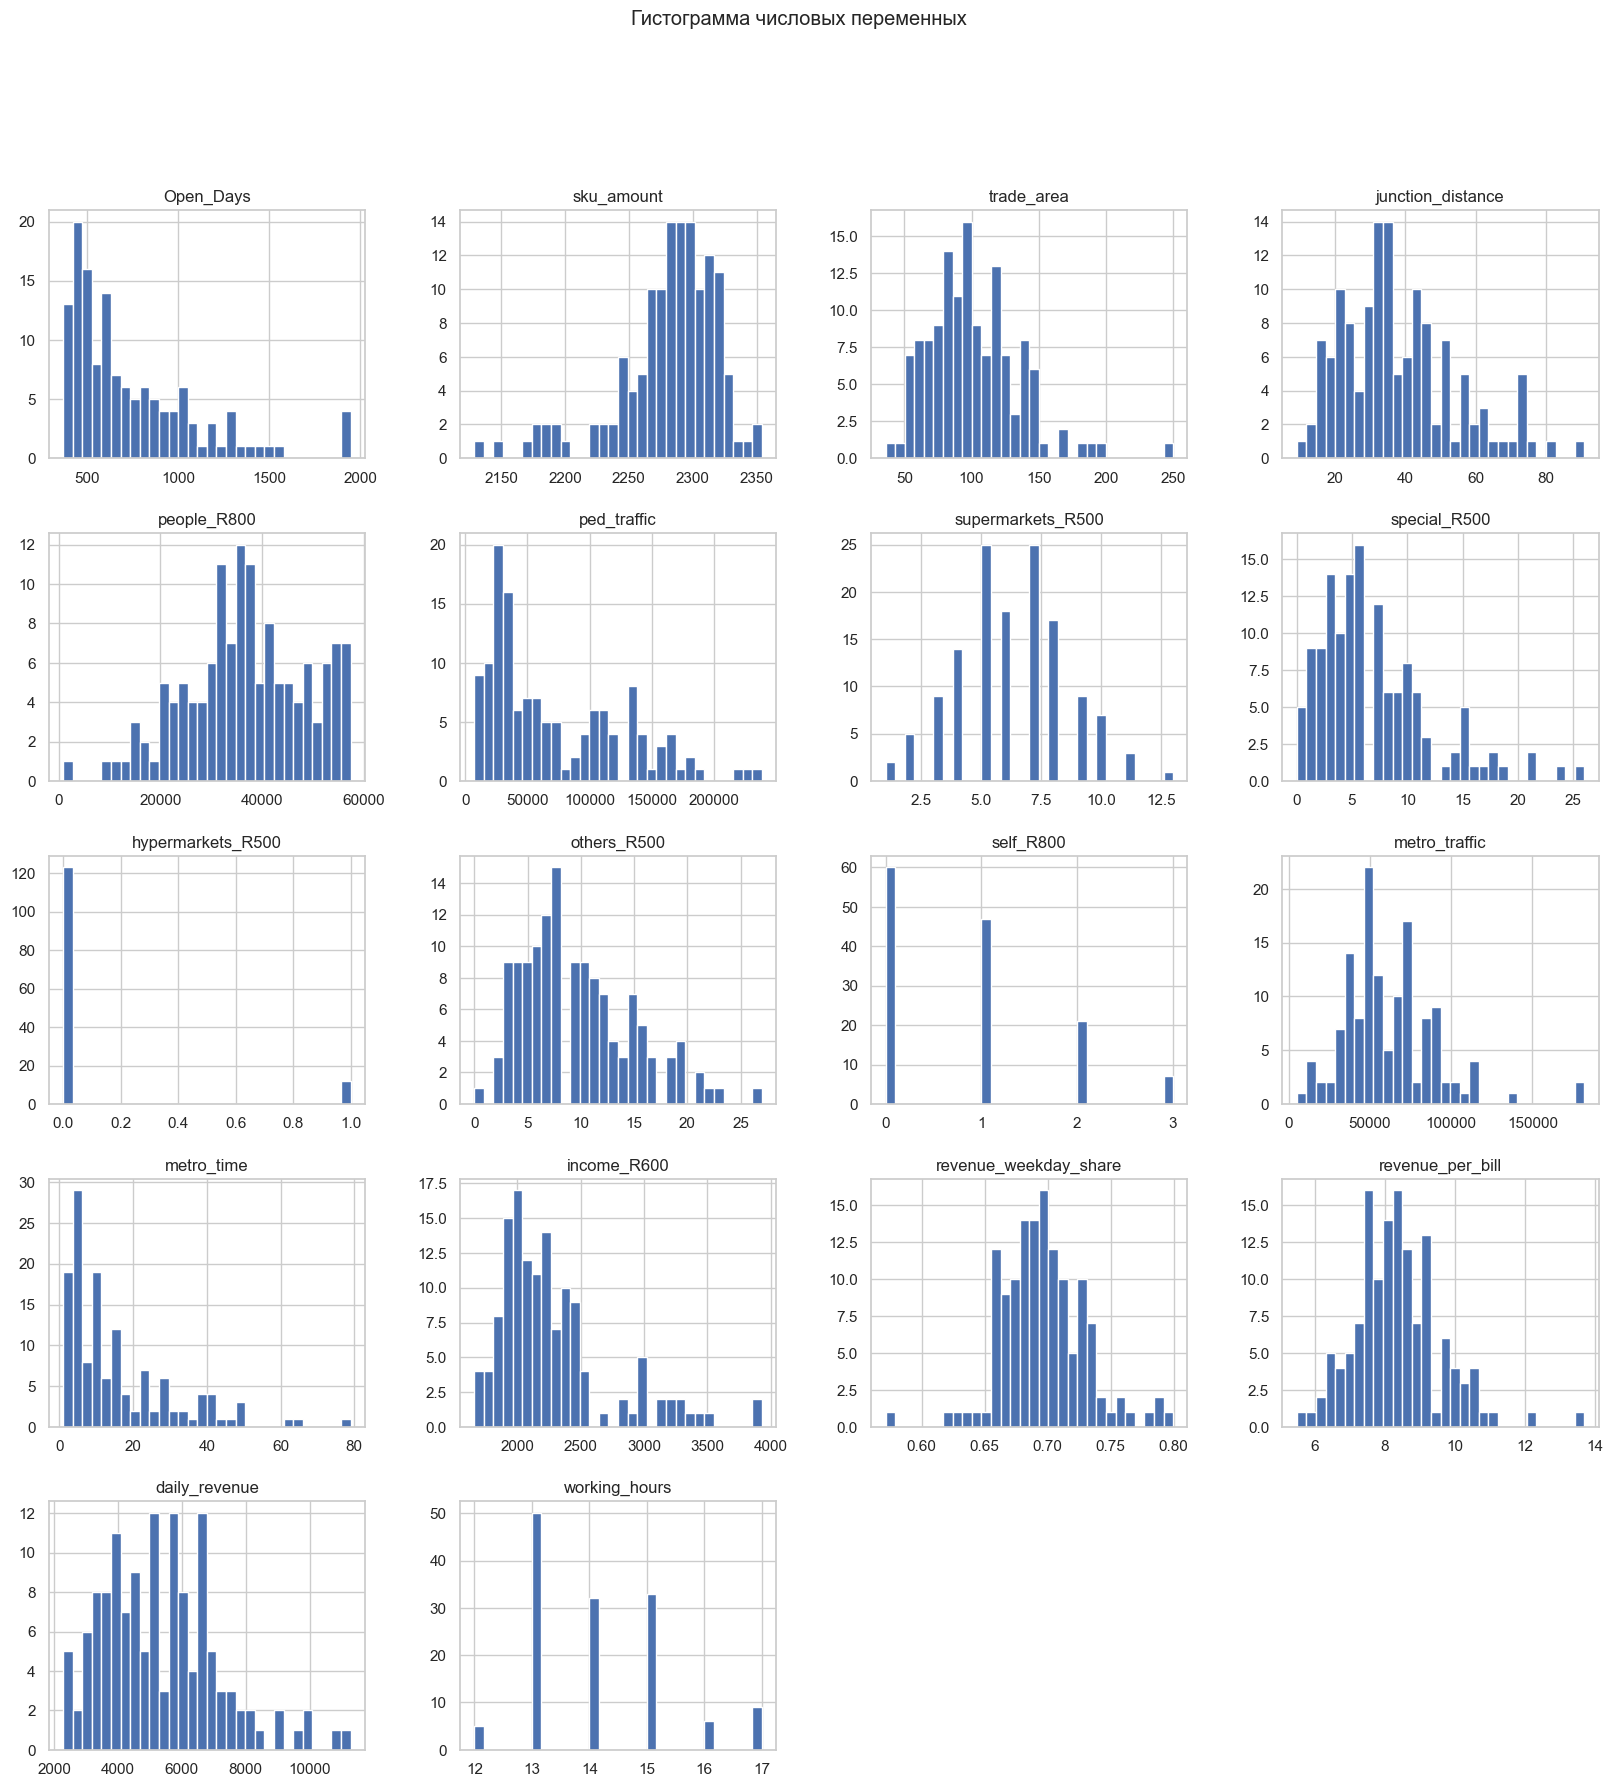

In [171]:
sns.set(style="whitegrid")

# Построение гистограмм для числовых столбцов для понимания распределения
df_urban_data.hist(bins=30, figsize=(20, 20))
plt.suptitle("Гистограмма числовых переменных")
plt.show()


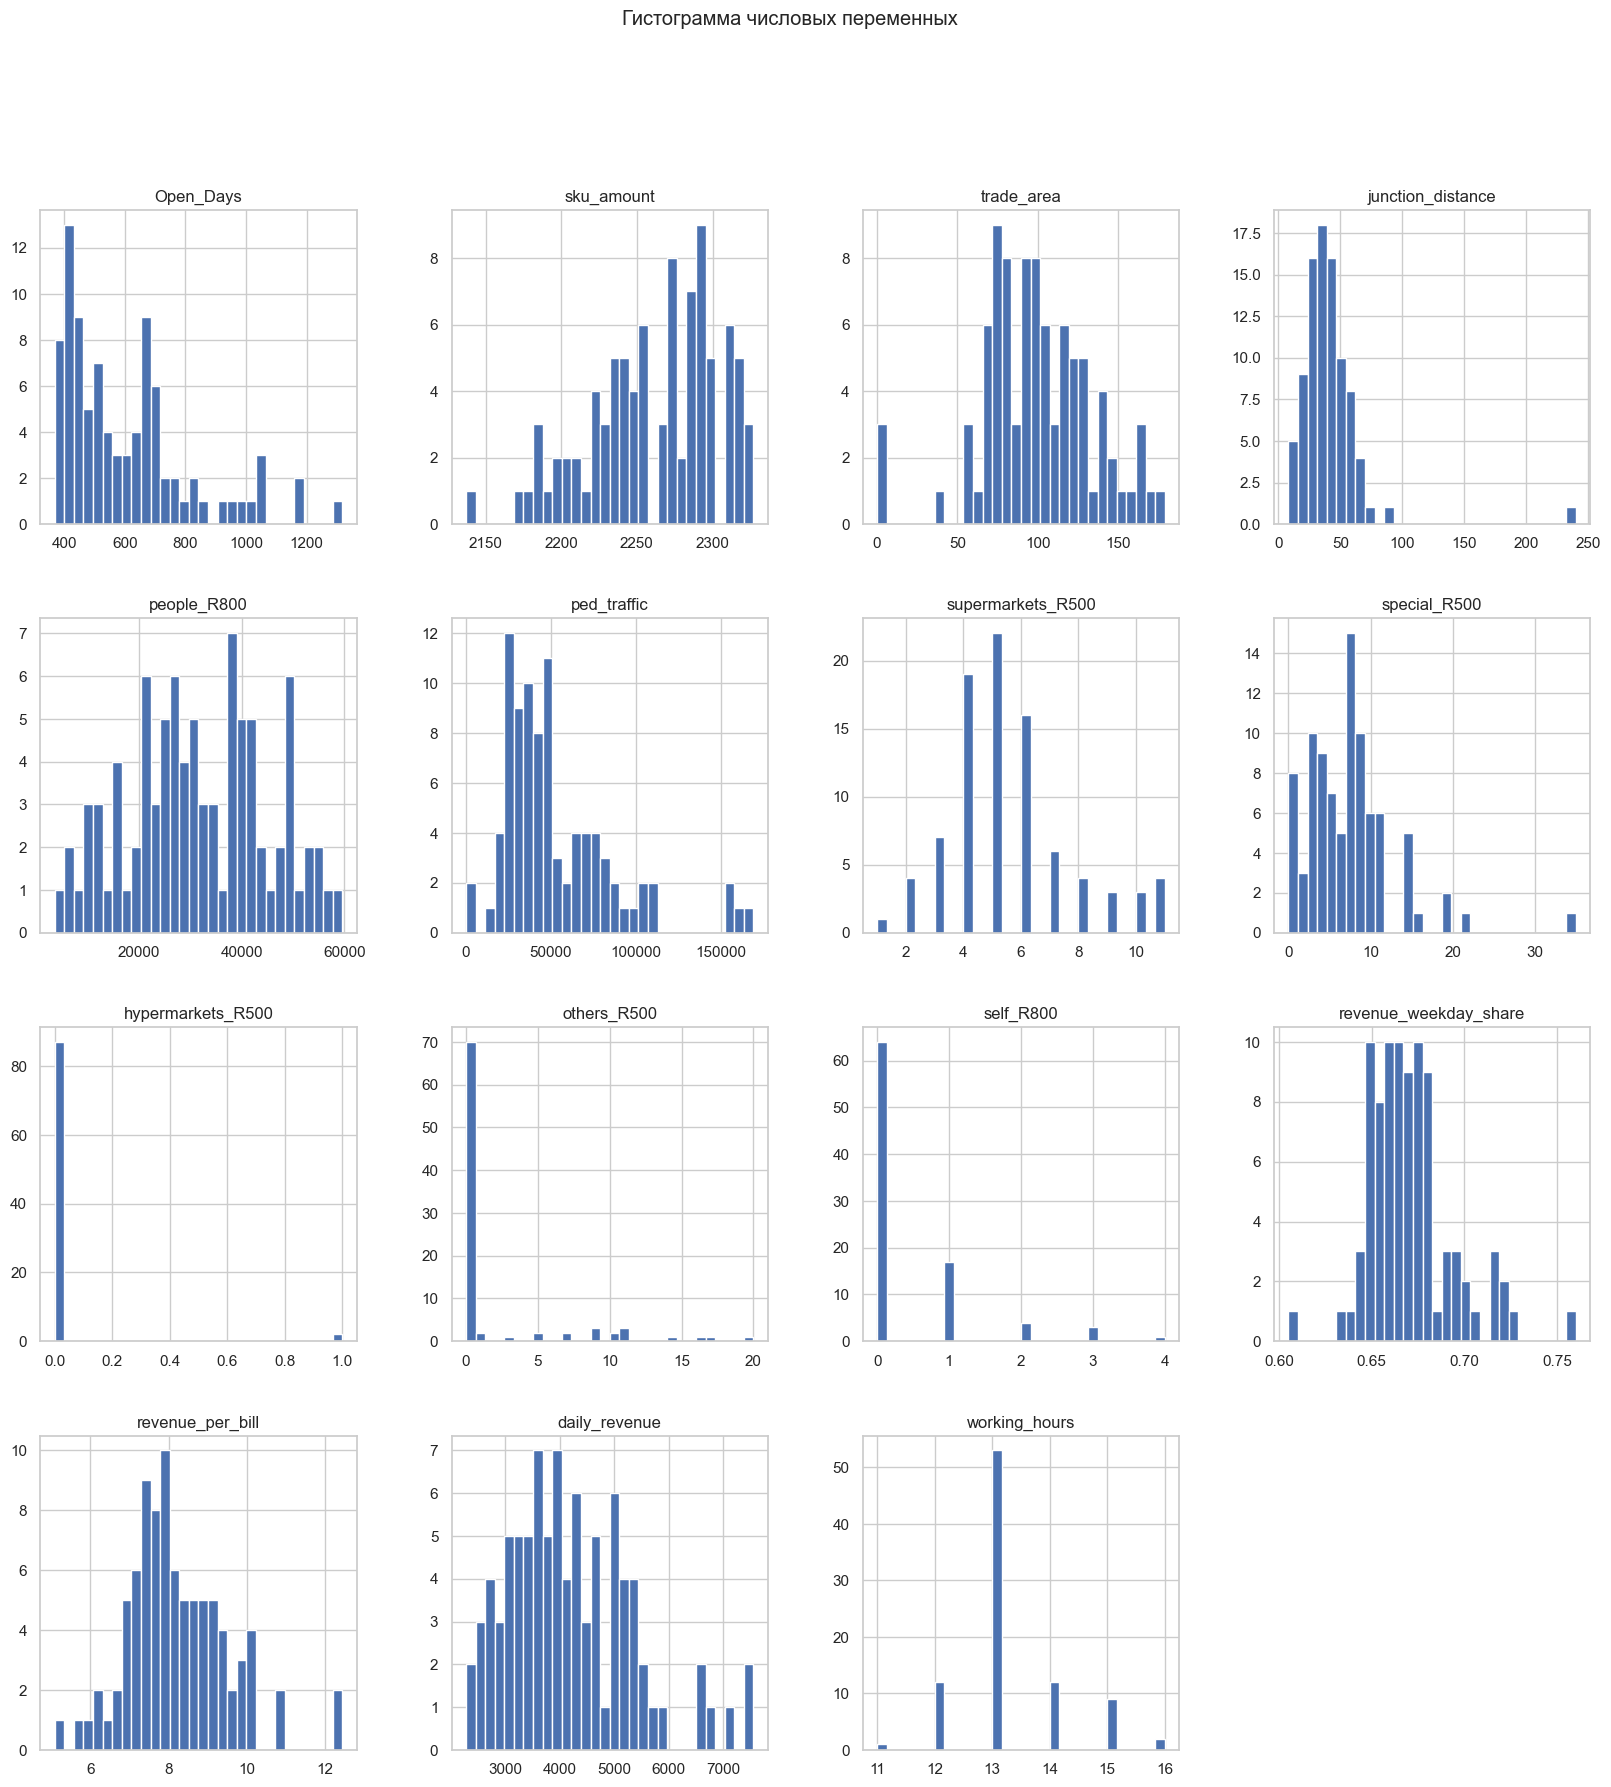

In [173]:
sns.set(style="whitegrid")

# Построение гистограмм для числовых столбцов для понимания распределения
df_rural_data.hist(bins=30, figsize=(20, 20))
plt.suptitle("Гистограмма числовых переменных")
plt.show()

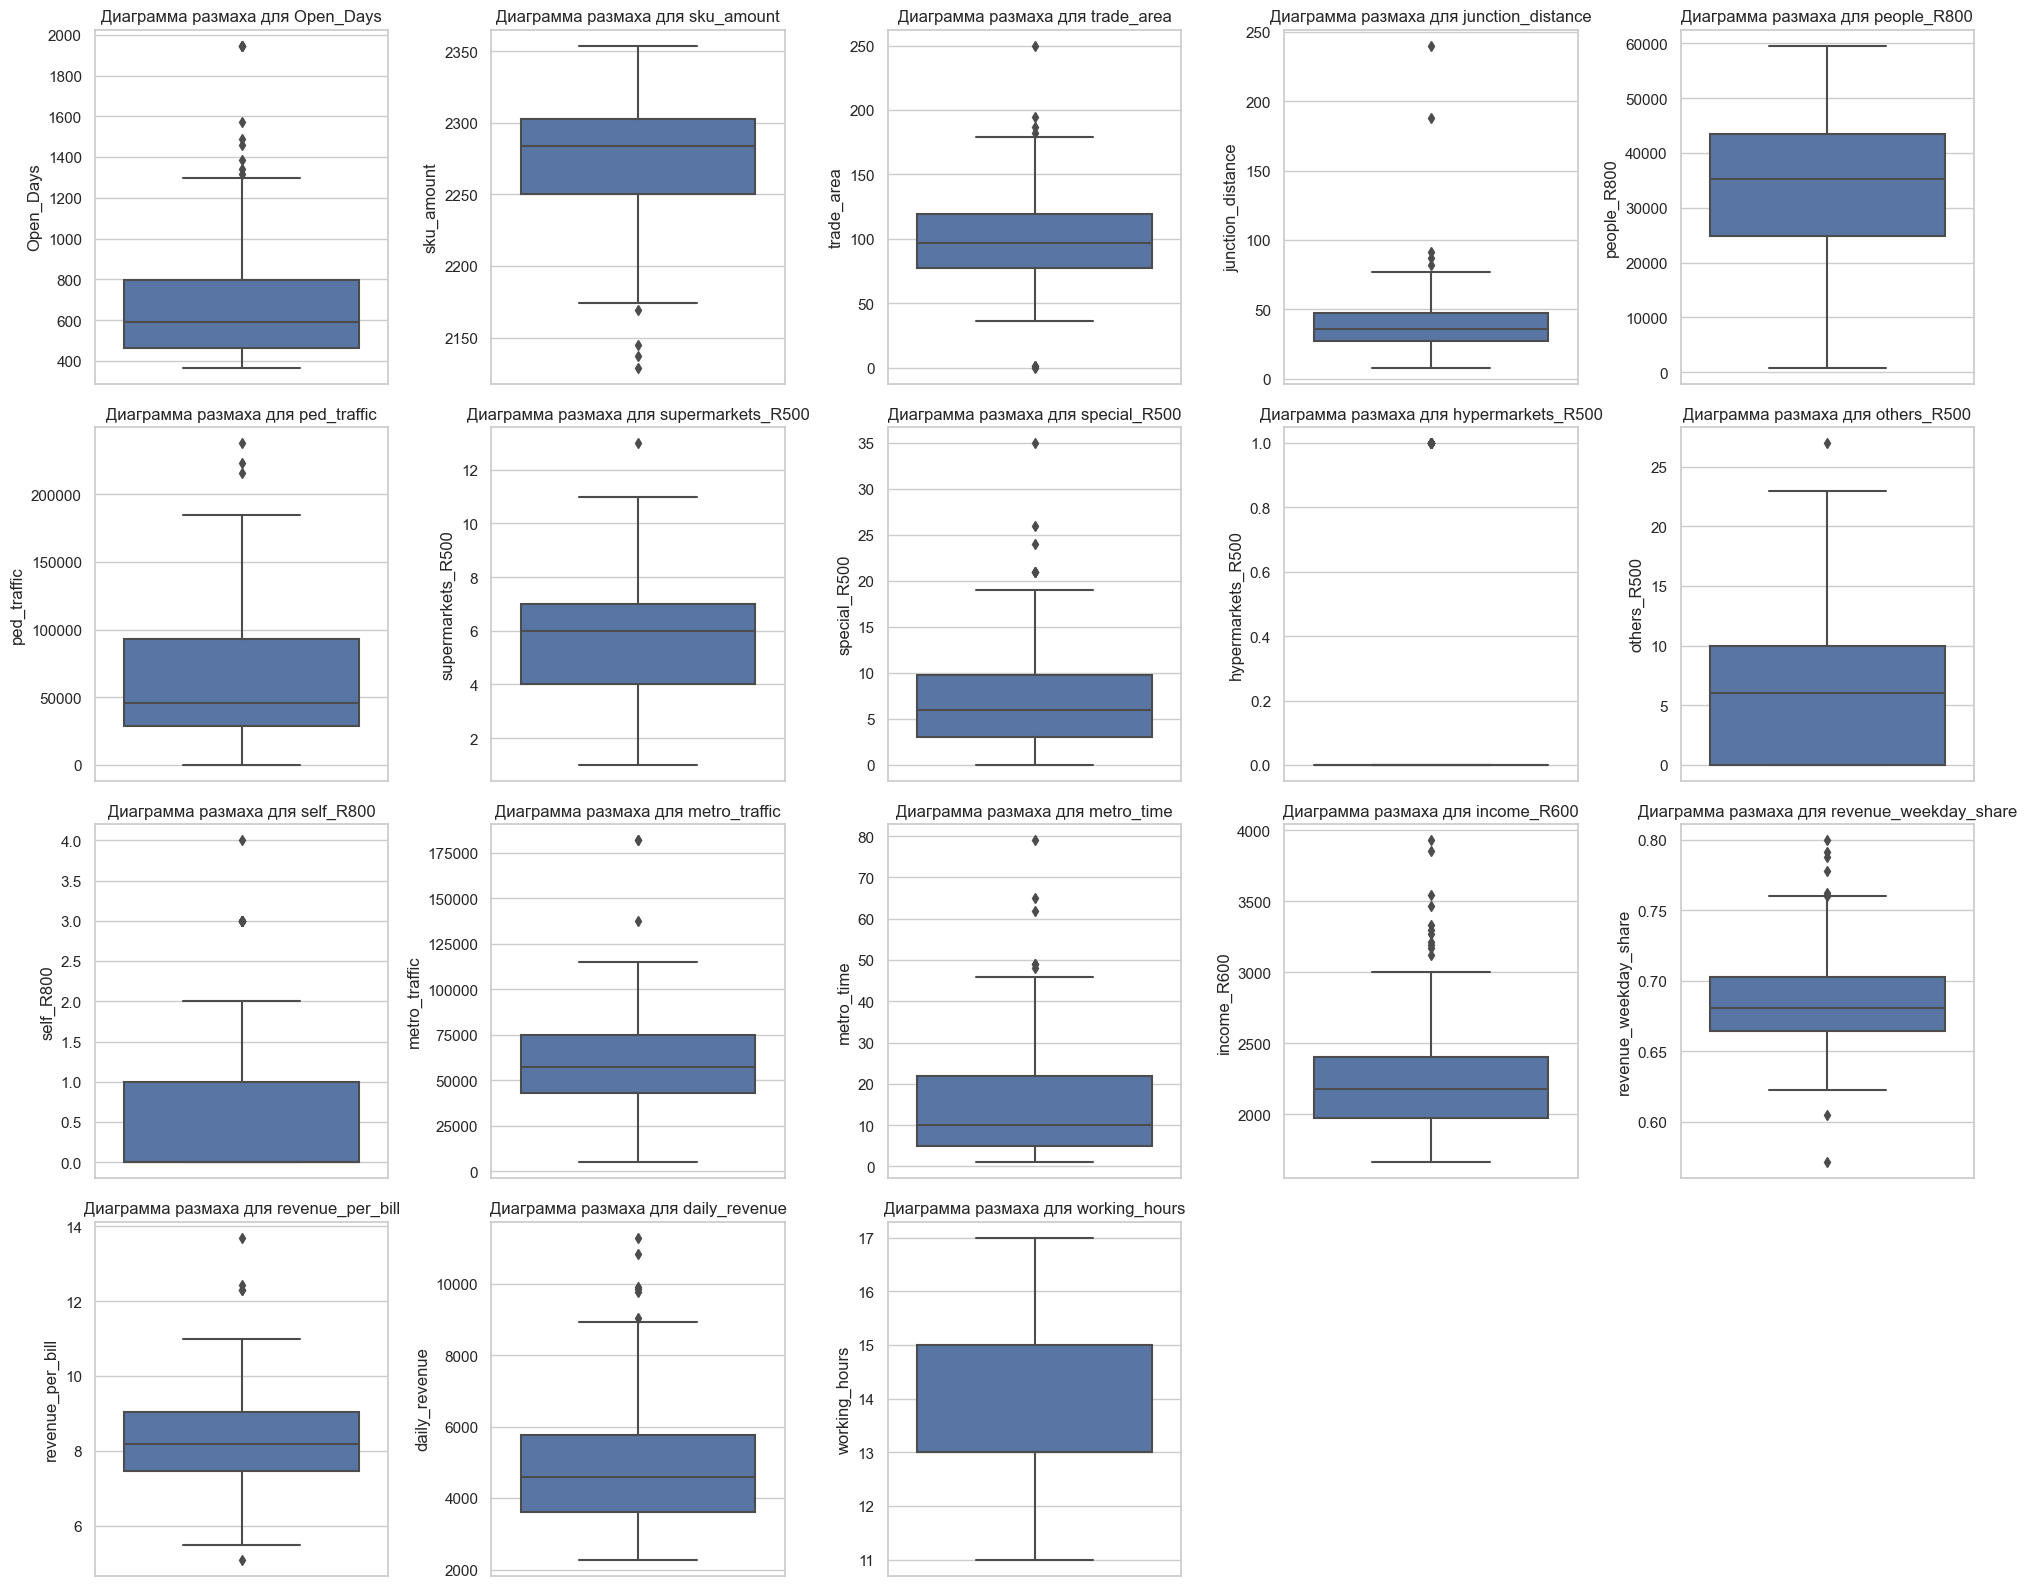

In [174]:
# Построение диаграмм размаха для числовых столбцов для понимания распределения и выбросов
plt.figure(figsize=(20, 20))
for i, col in enumerate(df_urban_data.columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=col, data=df)
    plt.title(f'Диаграмма размаха для {col}')
    
plt.tight_layout()
plt.show()


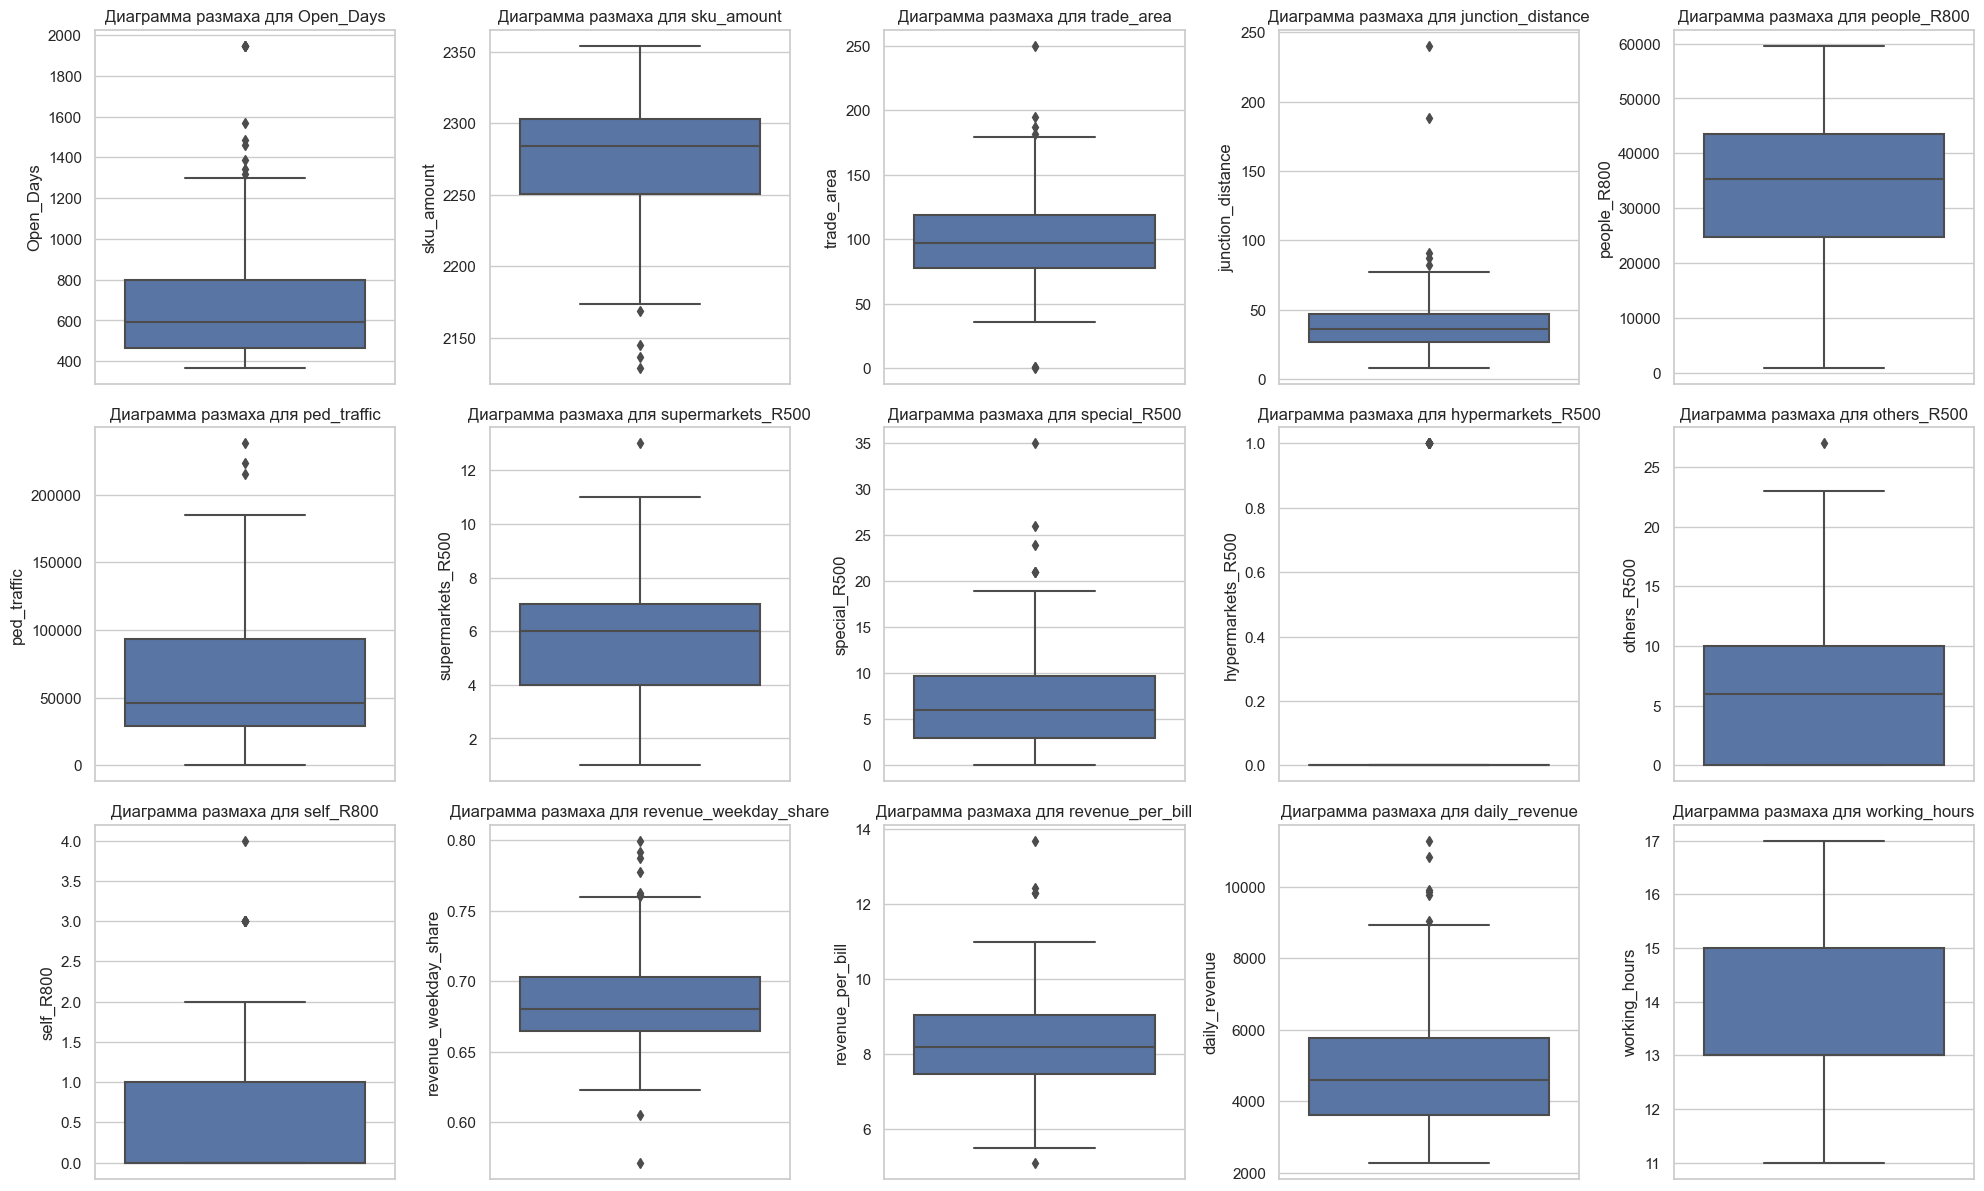

In [175]:
# Построение диаграмм размаха для числовых столбцов для понимания распределения и выбросов
plt.figure(figsize=(20, 20))
for i, col in enumerate(df_rural_data.columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=col, data=df)
    plt.title(f'Диаграмма размаха для {col}')
    
plt.tight_layout()
plt.show()

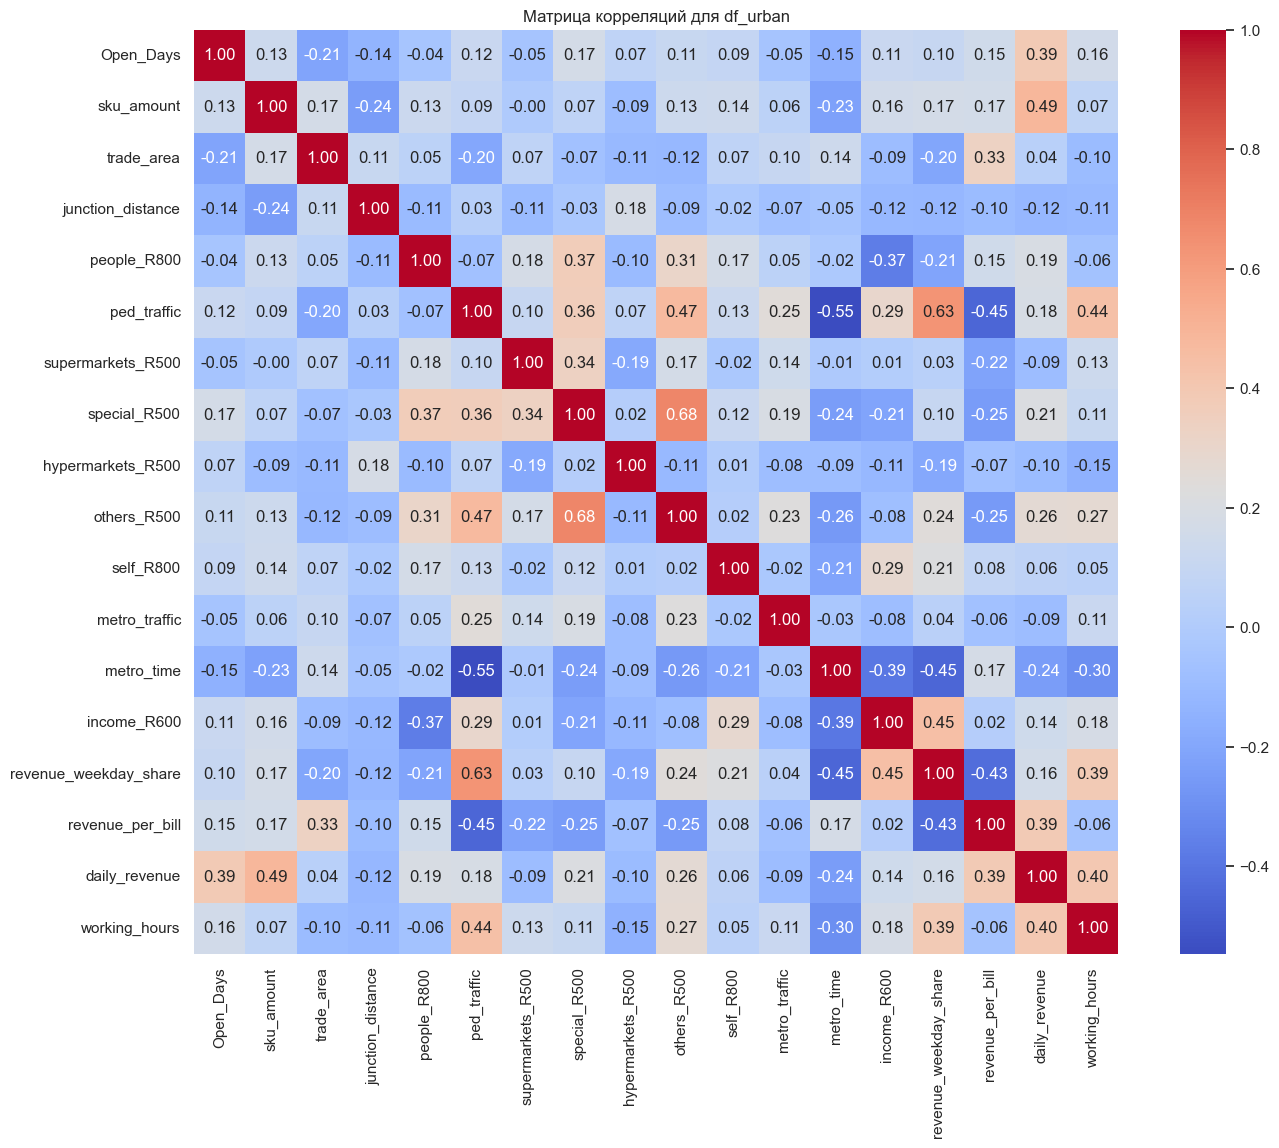

In [176]:
# Построение матрицы корреляций для df_urban
corr_matrix_urban = df_urban_data.corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix_urban, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Матрица корреляций для df_urban')
plt.show()


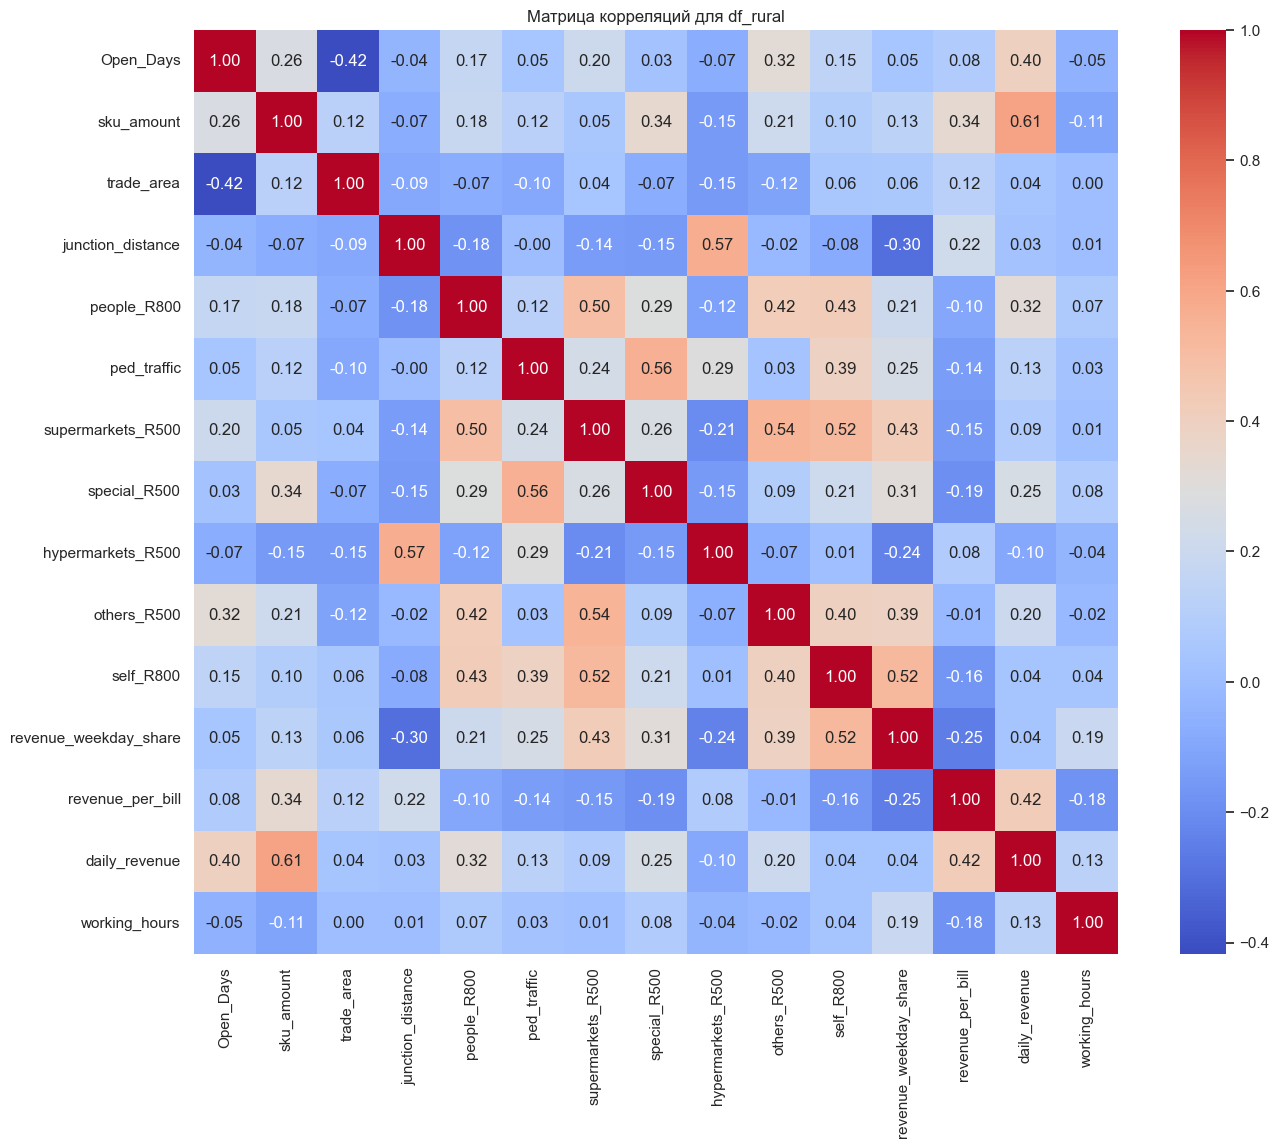

In [177]:
# Построение матрицы корреляций для df_rural
corr_matrix_rural = df_rural_data.corr()

# Визуализация матрицы корреляций
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix_rural, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Матрица корреляций для df_rural')
plt.show()

In [178]:
#обьединим два датафрейма
df_all = pd.concat([df_urban, df_rural])

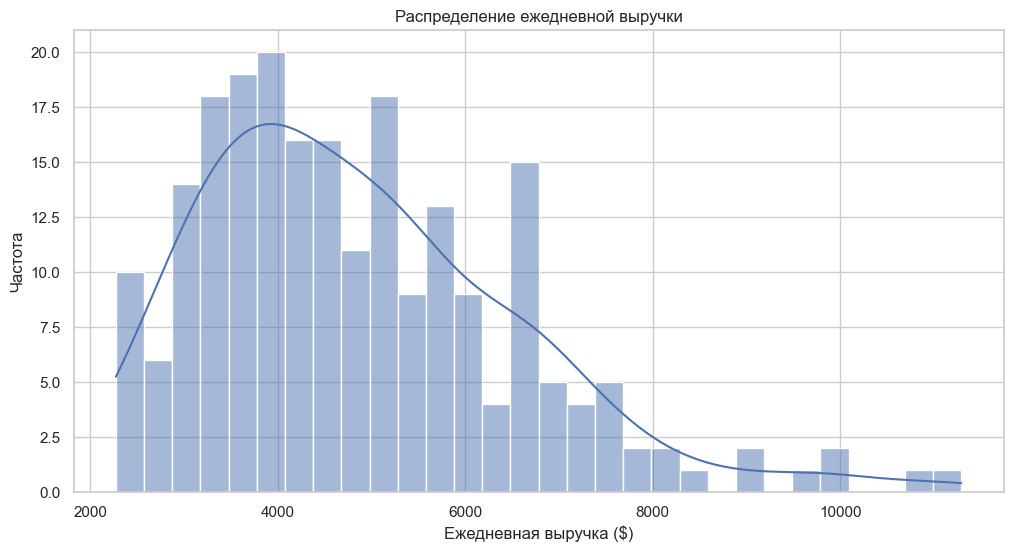

In [148]:
# Устанавливаем стиль seaborn для лучшей визуализации
sns.set(style="whitegrid")


# Проверяем распределение целевой переменной 'daily_revenue'
plt.figure(figsize=(12, 6))
sns.histplot(df_all['daily_revenue'], bins=30, kde=True)
plt.title('Распределение ежедневной выручки')
plt.xlabel('Ежедневная выручка ($)')
plt.ylabel('Частота')
plt.show()

График показывает распределение ежедневной выручки. По форме распределения можно сказать, что это скошенное вправо распределение. В этом случае, большинство магазинов имеют ежедневную выручку в нижнем диапазоне, но есть и те, у которых выручка значительно выше, что создает "хвост" справа на графике.
Такие распределения часто называют "логнормальными". Чтобы привести распределение к нормальному, можно прологарифмировать значения. После этого распределение станет более симметричным.



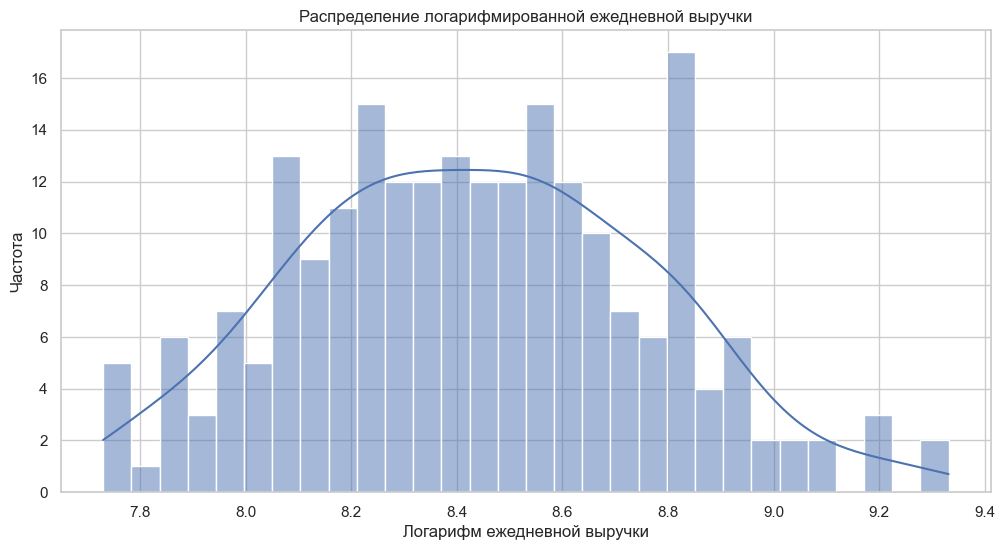

In [150]:
# Применяем логарифмическое преобразование к колонке 'daily_revenue'
df['log_daily_revenue'] = np.log1p(df_all['daily_revenue'])

# Построим гистограмму для логарифмированных данных
plt.figure(figsize=(12, 6))
sns.histplot(df['log_daily_revenue'], bins=30, kde=True)
plt.title('Распределение логарифмированной ежедневной выручки')
plt.xlabel('Логарифм ежедневной выручки')
plt.ylabel('Частота')
plt.show()


Нулевая гипотеза H0:
Среднедневная выручка магазинов в городской местности равна среднедневной выручке магазинов в сельской местности.

Альтернативная гипотеза H1:
Среднедневная выручка магазинов в городской местности отличается от среднедневной выручки магазинов в сельской местности.

In [162]:
# Логарифмирование 'daily_revenue' для городских и сельских магазинов
df_urban['daily_revenue_log'] = np.log1p(df_urban['daily_revenue'])
df_rural['daily_revenue_log'] = np.log1p(df_rural['daily_revenue'])

# Проведение двустороннего t-теста после логарифмирования
daily_revenue_urban_log = df_urban['daily_revenue_log']
daily_revenue_rural_log = df_rural['daily_revenue_log']

t_stat_log, p_value_log = ttest_ind(daily_revenue_urban_log, daily_revenue_rural_log, equal_var=False)

t_stat_log, p_value_log

(5.249155820389682, 3.6602254265987726e-07)

После проведения двустороннего t-теста мы получаем следующие результаты:

Статистика t: 
5.25
p-значение: 
3.66×10 −7
Так как p-значение значительно меньше стандартного порогового значения 
0.05, мы можем отвергнуть нулевую гипотезу в пользу альтернативной. Это означает, что среднедневная выручка магазинов в городской и сельской местности статистически значимо отличается.

Для проверки влияния близости к метро на выручку магазинов в городской местности, сформулируем следующие гипотезы:

Нулевая гипотеза H0:
Среднедневная выручка магазинов, расположенных близко к метро, не отличается от среднедневной выручки магазинов, расположенных далеко от метро.

Альтернативная гипотеза H1:
Среднедневная выручка магазинов, расположенных близко к метро, отличается от среднедневной выручки магазинов, расположенных далеко от метро.

Для определения, что считать "близким" или "далеким", мы можем использовать медиану  для распределения времени до метро ('metro_time') среди магазинов в городской местности. Затем проведем t-тест для сравнения среднедневной выручки этих двух групп.

In [160]:
# Преобразование 'daily_revenue' с помощью логарифмической функции для лучшей нормальности
df_urban['log_daily_revenue'] = np.log1p(df_urban['daily_revenue'])

# Первая гипотеза: магазины, ближе к метро, имеют разную выручку, чем те, которые находятся далеко
# Мы считаем магазины ближе к метро, если время до метро меньше медианного значения
median_metro_time = df_urban['metro_time'].median()
close_to_metro = df_urban[df_urban['metro_time'] <= median_metro_time]['log_daily_revenue']
far_from_metro = df_urban[df_urban['metro_time'] > median_metro_time]['log_daily_revenue']

# Проведение t-теста
t_stat_metro, p_value_metro = ttest_ind(close_to_metro, far_from_metro)

t_stat_metro, p_value_metro

(3.307735484452432, 0.0012099140309013668)

Результат t-теста:

t = 3.31
p-значение = 0.0012
Поскольку p-значение меньше уровня значимости 0.05, мы отвергаем нулевую гипотезу и делаем вывод, что магазины, находящиеся ближе к метро, действительно имеют статистически значимую разницу в выручке по сравнению с магазинами, расположенными дальше от метро. Это может быть одним из драйверов выручки для магазинов в городской местности.

Для анализа влияния численности населения в радиусе 800 метров на ежедневную выручку магазинов, сформулируем следующие гипотезы:

Нулевая гипотеза H 0:
Среднедневная выручка магазинов не зависит от численности населения в радиусе 800 метров.

Альтернативная гипотеза H 1:
Среднедневная выручка магазинов зависит от численности населения в радиусе 800 метров.

Для проведения теста, мы разделим все магазины на две группы: одна с высокой численностью населения в радиусе 800 метров (выше медианы) и другая с низкой численностью населения (ниже медианы). Затем мы проведем t-тест для сравнения средней ежедневной выручки этих двух групп.

In [164]:
# Мы считаем магазины с более высокой плотностью населения, если значение 'people_R800' больше медианного значения
median_people_R800 = df_all['people_R800'].median()
higher_population = df_all[df_all['people_R800'] >= median_people_R800]['log_daily_revenue']
lower_population = df_all[df_all['people_R800'] < median_people_R800]['log_daily_revenue']

# Проведение t-теста
t_stat_population, p_value_population = ttest_ind(higher_population, lower_population)

t_stat_population, p_value_population

(3.5592691341459646, 0.00045477324123571907)

Результат t-теста:

t-статистика: 3.56
p-значение: 0.00045
Так как 
p-значение меньше 0.05, мы отвергаем нулевую гипотезу в пользу альтернативной: магазины с большим населением в радиусе 800 метров имеют статистически значимую разницу в выручке по сравнению с магазинами с меньшим населением в этом радиусе.

Нулевая гипотеза H 0: 
Среднедневная выручка магазинов с высоким средним доходом семьи в радиусе 600 метров равна среднедневной выручке магазинов с низким средним доходом семьи в радиусе 600 метров.

Альтернативная гипотеза H 1: 
Среднедневная выручка магазинов с высоким средним доходом семьи в радиусе 600 метров отличается от среднедневной выручки магазинов с низким средним доходом семьи в радиусе 600 метров.

In [166]:
# Преобразование 'daily_revenue' с помощью логарифмической функции для лучшей нормальности
df_urban['log_daily_revenue'] = np.log1p(df_urban['daily_revenue'])

# Следующая гипотеза: магазины с высоким средним доходом семьи в радиусе 600м имеют разную выручку
# Мы считаем магазины с высоким средним доходом, если доход выше медианного значения
median_income = df_urban['income_R600'].median()
high_income = df_urban[df_urban['income_R600'] > median_income]['log_daily_revenue']
low_income = df_urban[df_urban['income_R600'] <= median_income]['log_daily_revenue']

# Проведение t-теста
t_stat_income, p_value_income = ttest_ind(high_income, low_income)

t_stat_income, p_value_income

(3.443589384755591, 0.0007680875065753739)

Результат t-теста:

t-статистика: 3.44
p-значение: 0.00077
Поскольку p-значение меньше 0.05, мы отвергаем нулевую гипотезу в пользу альтернативной. Это означает, что есть статистически значимая разница в среднедневной выручке между магазинами с высоким и низким средним доходом семьи в радиусе 600 метров. Выручка в этих двух группах отличается.

Нулевая гипотеза H 0:  Магазины с высоким пешеходным трафиком имеют такую же дневную выручку, как и магазины с низким пешеходным трафиком.
Альтернативная гипотеза H 1: Магазины с высоким пешеходным трафиком имеют другую дневную выручку, чем магазины с низким пешеходным трафиком.

In [184]:
# Применение логарифмического преобразования к 'daily_revenue'
df_all['log_daily_revenue'] = np.log1p(df_all['daily_revenue'])

# Гипотеза о пешеходном трафике для всего набора данных
# Мы считаем пешеходный трафик высоким, если он больше медианного значения
median_ped_traffic = df_all['ped_traffic'].median()
high_ped_traffic = df_all[df_all['ped_traffic'] > median_ped_traffic]['log_daily_revenue']
low_ped_traffic = df_all[df_all['ped_traffic'] <= median_ped_traffic]['log_daily_revenue']

# Проведение t-теста
t_stat_ped_traffic, p_value_ped_traffic = ttest_ind(high_ped_traffic, low_ped_traffic)

t_stat_ped_traffic, p_value_ped_traffic


(3.0419062790794396, 0.0026338203720735866)

Результат t-теста:

Значение t-статистики для гипотезы о пешеходном потоке составляет примерно 3.40, 
а p-значение примерно 0.003
Учитывая, что p-значение значительно меньше 
0.05, мы отвергаем нулевую гипотезу. Это предполагает, что магазины с высоким пешеходным потоком имеют отличную от магазинов с низким пешеходным потоком ежедневную выручку, что подтверждает альтернативную гипотезу. 

Анализ драйверов ежедневной выручки магазинов

Цель анализа

Цель данного анализа — выявить ключевые факторы, влияющие на ежедневную выручку магазинов в различных типах населенных пунктов: в городе и в сельской местности. Для этого мы использовали метрики, связанные с местоположением, финансовые и экономические показатели, а также операционные метрики.

Основные результаты

Для городских магазинов:

Метрики, связанные с местоположением:
Время до метро (metro_time): Оказывает значительное влияние на ежедневную выручку.
Пешеходный трафик (ped_traffic): Высокий пешеходный трафик коррелирует с большей выручкой.
Численность населения в радиусе 800 м (people_R800): Большая численность населения влияет на увеличение выручки.

Финансовые и экономические метрики:
Оценка среднего дохода семьи в радиусе 600 м (income_R600): Влияет на выручку.
Операционные метрики:
Количество дней работы (Open_Days), количество SKU (sku_amount), и торговая площадь (trade_area): Положительно влияют на выручку.
Для сельских магазинов:

Метрики, связанные с местоположением:
Расстояние до перекрестка (junction_distance): Короткое расстояние положительно сказывается на выручке.
Численность населения в радиусе 800 м (people_R800): Большая численность населения влияет на увеличение выручки.
Операционные метрики:
Количество дней работы (Open_Days), количество SKU (sku_amount), и торговая площадь (trade_area): Положительно влияют на выручку.

Заключение

На основе анализа можно заключить, что различные факторы, такие как местоположение, экономические и операционные метрики, имеют значительное влияние на ежедневную выручку магазинов в разных типах населенных пунктов. Эти выводы будут полезны для дальнейшего моделирования и оптимизации бизнес-процессов.

In [216]:
# Применение логарифмического преобразования к 'daily_revenue' для лучшей нормальности
df_urban['log_daily_revenue'] = np.log1p(df_urban['daily_revenue'])

# Выбор признаков для модели на основе предыдущего анализа
selected_features_urban = ['working_hours', 'sku_amount', 'Open_Days',
                           'special_R500', 'others_R500', 'ped_traffic', 'income_R600',
                           'people_R800', 'metro_time', 'junction_distance']

# Заполнение пропущенных значений медианным значением для выбранных признаков
for col in selected_features_urban:
    df_urban[col].fillna(df_urban[col].median(), inplace=True)

# Разделение данных на обучающую и тестовую выборки
X_urban = df_urban[selected_features_urban]
y_urban = df_urban['log_daily_revenue']
X_train_urban, X_test_urban, y_train_urban, y_test_urban = train_test_split(X_urban, y_urban, test_size=0.2, random_state=42)

# Создание и обучение модели множественной линейной регрессии
linear_reg_model_urban = LinearRegression()
linear_reg_model_urban.fit(X_train_urban, y_train_urban)

# Прогнозирование на тестовой выборке
y_pred_urban = linear_reg_model_urban.predict(X_test_urban)

# Расчет метрик производительности модели
rmse_urban = np.sqrt(mean_squared_error(y_test_urban, y_pred_urban))
r2_urban = r2_score(y_test_urban, y_pred_urban)

rmse_urban, r2_urban

(0.0032473216689830205, 0.5455372212884172)

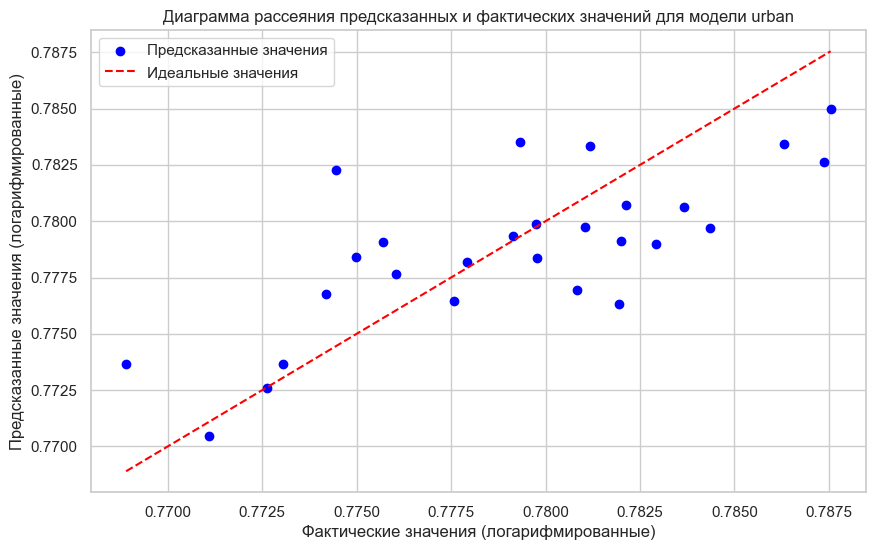

In [217]:

# Диаграмма рассеяния предсказанных и фактических значений для модели urban
plt.figure(figsize=(10, 6))
plt.scatter(y_test_urban, y_pred_urban, color='blue', label='Предсказанные значения')
plt.plot([min(y_test_urban), max(y_test_urban)], [min(y_test_urban), max(y_test_urban)], linestyle='--', color='red', label='Идеальные значения')
plt.xlabel('Фактические значения (логарифмированные)')
plt.ylabel('Предсказанные значения (логарифмированные)')
plt.title('Диаграмма рассеяния предсказанных и фактических значений для модели urban')
plt.legend()
plt.show()

Выводы после применения модели для городских магазинов
Основные метрики модели

Корень из среднеквадратичной ошибки (RMSE): Значение RMSE составляет примерно 0.0032. Это низкое значение, что говорит о хорошей точности модели.
Коэффициент детерминации (R2): 
Значение R2 составляет примерно 0.545, что указывает на то, что примерно 54.5% вариации в ежедневной выручке могут быть объяснены моделью.

Заключение

Модель множественной линейной регрессии для городских магазинов показала хорошие результаты и может быть использована для прогнозирования ежедневной выручки на основе ряда ключевых переменных. Эти результаты могут быть полезными для дальнейшего планирования и оптимизации бизнес-процессов в городских магазинах.

In [206]:
# Логарифмирование целевой переменной для нормализации
df_rural['log_daily_revenue'] = np.log1p(df_rural['daily_revenue'])

# Выбор переменных для модели на основе предыдущего анализа
selected_features_rural = ['working_hours', 'sku_amount', 'Open_Days', 'special_R500', 'others_R500', 
                           'ped_traffic', 'people_R800', 'junction_distance']

# Заполнение пропущенных значений медианой
for col in selected_features_rural:
    df_rural[col].fillna(df_rural[col].median(), inplace=True)

# Разделение данных на обучающую и тестовую выборки
X_rural = df_rural[selected_features_rural]
y_rural = df_rural['log_daily_revenue']
X_train_rural, X_test_rural, y_train_rural, y_test_rural = train_test_split(X_rural, y_rural, test_size=0.2, random_state=42)

# Обучение модели множественной линейной регрессии для сельской местности
linear_reg_model_rural = LinearRegression()
linear_reg_model_rural.fit(X_train_rural, y_train_rural)

# Прогнозирование на тестовом наборе данных
y_pred_rural = linear_reg_model_rural.predict(X_test_rural)

# Вычисление метрик качества модели
rmse_rural = np.sqrt(mean_squared_error(y_test_rural, y_pred_rural))
r2_rural = r2_score(y_test_rural, y_pred_rural)

rmse_rural, r2_rural


(0.2075376732031297, 0.44548971501393286)

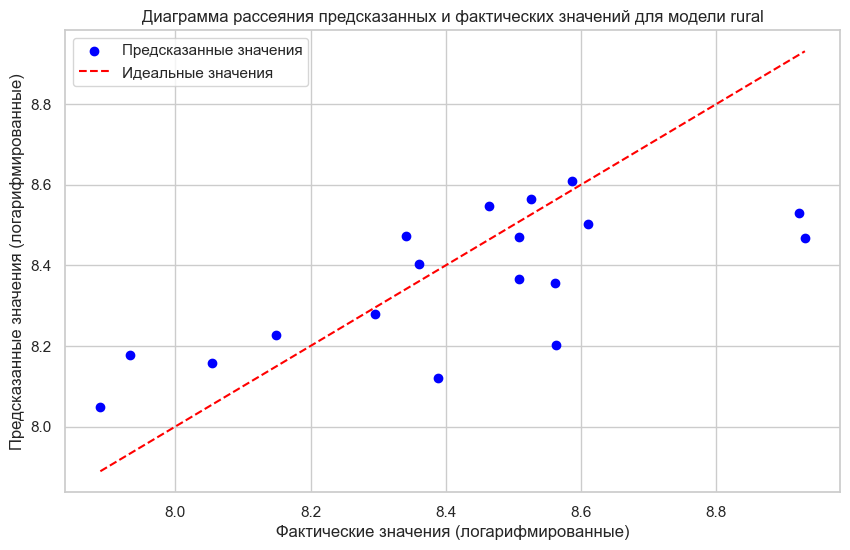

In [218]:
# Диаграмма рассеяния предсказанных и фактических значений для модели rural
plt.figure(figsize=(10, 6))
plt.scatter(y_test_rural, y_pred_rural, color='blue', label='Предсказанные значения')
plt.plot([min(y_test_rural), max(y_test_rural)], [min(y_test_rural), max(y_test_rural)], linestyle='--', color='red', label='Идеальные значения')
plt.xlabel('Фактические значения (логарифмированные)')
plt.ylabel('Предсказанные значения (логарифмированные)')
plt.title('Диаграмма рассеяния предсказанных и фактических значений для модели rural')
plt.legend()
plt.show()

Выводы после применения модели для сельских магазинов
Основные метрики модели

Корень из среднеквадратичной ошибки (RMSE): Значение RMSE составляет примерно 0.208. Хотя это значение относительно низкое, оно выше, чем для городских магазинов. Это может быть связано с отсутствующими или неполными данными для сельских магазинов.
Коэффициент детерминации (R2): Значение R2 составляет примерно 0.445. Это указывает на то, что примерно 44.5% вариации в ежедневной выручке могут быть объяснены моделью. Этот показатель ниже, чем для городских магазинов, что также может быть связано с недостатком данных для сельских магазинов.
Заключение

Модель множественной линейной регрессии для сельских магазинов показала хорошие результаты, но они могут быть искажены из-за отсутствующих или неполных данных. Несмотря на это, модель может быть полезной для прогнозирования ежедневной выручки на основе доступных ключевых переменных, таких как рабочие часы, количество SKU, и количество дней работы. Эти результаты предоставляют ценную информацию для дальнейшего планирования и оптимизации бизнес-процессов в сельских магазинах, хотя дополнительные данные могут улучшить точность и надежность прогнозов.

Список дополнительных данных, которые могут быть полезны для дальнейшего анализа, с указанием их назначения:

Сезонные факторы: Данные о сезонности, праздничных и выходных днях для анализа влияния на выручку.

Демографические данные: Возраст, пол, и образование населения в радиусе для лучшего понимания потребительской базы.

Ассортимент товаров: Данные о наличии и продажах разных категорий товаров для анализа их влияния на общую выручку.

Маркетинговые активности: Информация о проведенных и планируемых рекламных кампаниях, скидках и акциях для анализа их эффективности.

Транспортная доступность: Наличие парковок, близость к остановкам общественного транспорта для оценки удобства местоположения.

Поток посетителей: Данные о времени с наибольшим и наименьшим пешеходным и транспортным трафиком для оптимизации рабочего времени магазина.

Локальные особенности: Сведения о местных событиях, туризме, сельскохозяйственных циклах и других факторах для анализа влияния на спрос и выручку.

Доступность и удаленность: Расстояние до крупных дорог или населенных пунктов для оценки логистической эффективности.

Исторические данные: Прошлые показатели выручки, операционные затраты, и другие финансовые метрики для временного анализа и трендов.

Оценки и отзывы клиентов: Данные о клиентском опыте для улучшения качества услуг и анализа влияния на выручку.

Сбор этих данных может значительно улучшить точность прогнозных моделей и предоставить ценные инсайты для бизнес-решений.

Геоданные.
